In [2]:
from IPython.display import Image

# Active Learning

Def: Uczenie maszynowe (ang. Machine Learning)
<blockquote>
Dziedzina sztucznej inteligencji bazująca na statystyce, która za pomocą algorytmów tworzy
modele które starają się samodzielnie wydobywać cechy z danych i na podstawie tych cech buduje
efektywne modele rozwiązujące dane zadanie.
Uczenie się w takich systemach polega na jednoczesnym wydobywaniu relewantnych cech i
osiągnięciu jak najlepszej zdolności predykcyjnej.
</blockquote>

Def: Uczenie nadzorowane (ang. Supervised Learning)
<blockquote>
Jest to forma uczenia maszynowego, polegająca na tym, że algorytm na podstawie danych X i związanych z nimi etykiet Y, które razem tworzą przyporządowanie, musi wydobyć cechy z X, takie by jak najlepiej owe przyporzadowanie odzwierciedlić na niewidzianych do tej pory danych. 
</blockquote>


W dzisiejszych czasach mamy natlok informacji plynacych z wszelakich zrodel, problem jest jedynie jak je wykorzystac i jak w nich znalezc zaleznosci.

W uczeniu nadzorowanym, algorytm musi miec dostarczone oznakowane dane, ktore sluzyc mu beda do uczenia sie wzorca, odpowiedniej zaleznosci, ktorej aproksymacje chcemy wykorzystac do oznakowania niewidzianych do tej pory przykladow.

Niestety najczesciej zbieramy jedynie dane, ktorych etykiety musimy przypisac wlasnorecznie.

Proces ten jest czasochlonny, a co najwazniejsze kosztowny.

Pomyslem stojacym za active learningiem(AL) jest czesciowe dosylanie klasyfikatorowi oznaczonych danych, lecz jedynie tych ktore klasyfikator "uwaza" za wazne(najbardziej infomatywne), w danym kroku czasowym, na ktorych przeprowadzi on uczenie sie.

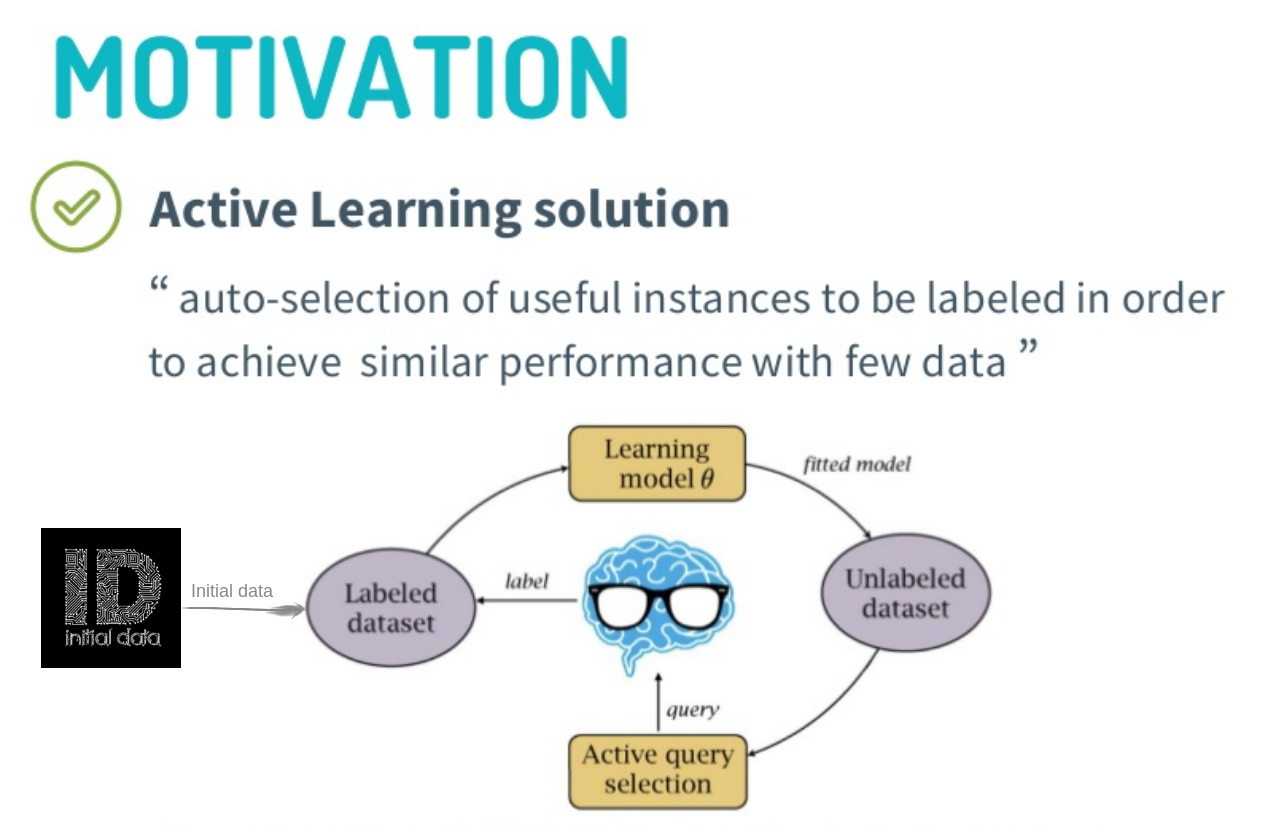

In [44]:
Image("pict/new_motivation.png", width=700)

Cykl bedzie sie powtarzal az do pewnego warunku stopu.

Mowie w tej prezentacji jedynie o klasyfikacji, poniewaz nie mam pojecia jakby to mozna byloby ugryzc od strony regresyjnej.

Pierwsza przeszkoda jest to ze w standardowych podejsciach active learningu algorytm z gory wie iloma etykietami dane zostana oznaczone.

W przyszłości chciałbym zajac sie problem mozliwosci aktywnego rozbudowywania taksonomi w problemach klasyfikacji.

W tej pracy przedstawie znalezione w literaturze i internecie podejścia do AL.

## Przyklad klasyfikatora

Wezmy dane binarne, czyli dane w ktorych kazdy przyklad moze byc oznaczony jedna z dwoch etykiet. Na tych danych zostanie zaprezentowana idea AL, czyli wskazanie efektywnie czasowo modelu oznaczajacego poprawnie wszystkie dane 

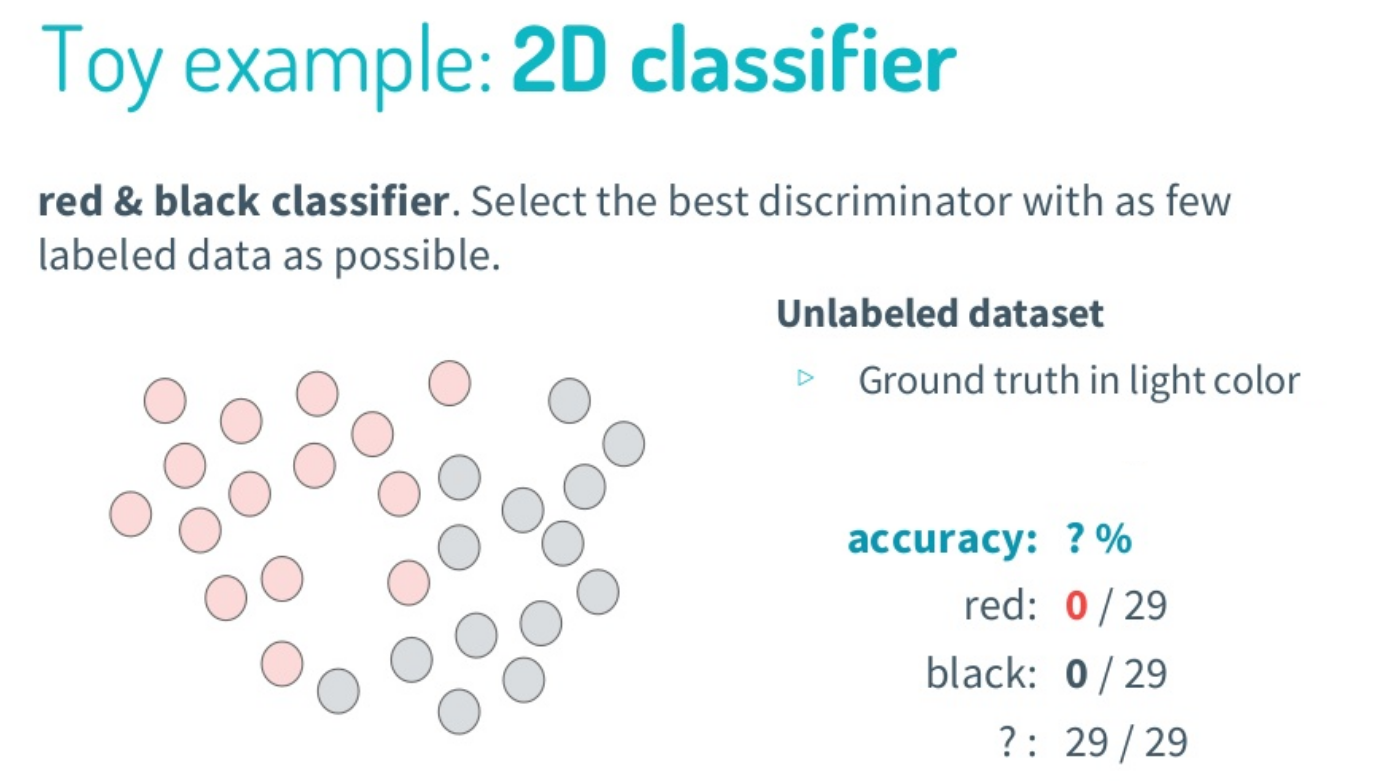

In [32]:
Image("pict/al_ex1.png", width=700)

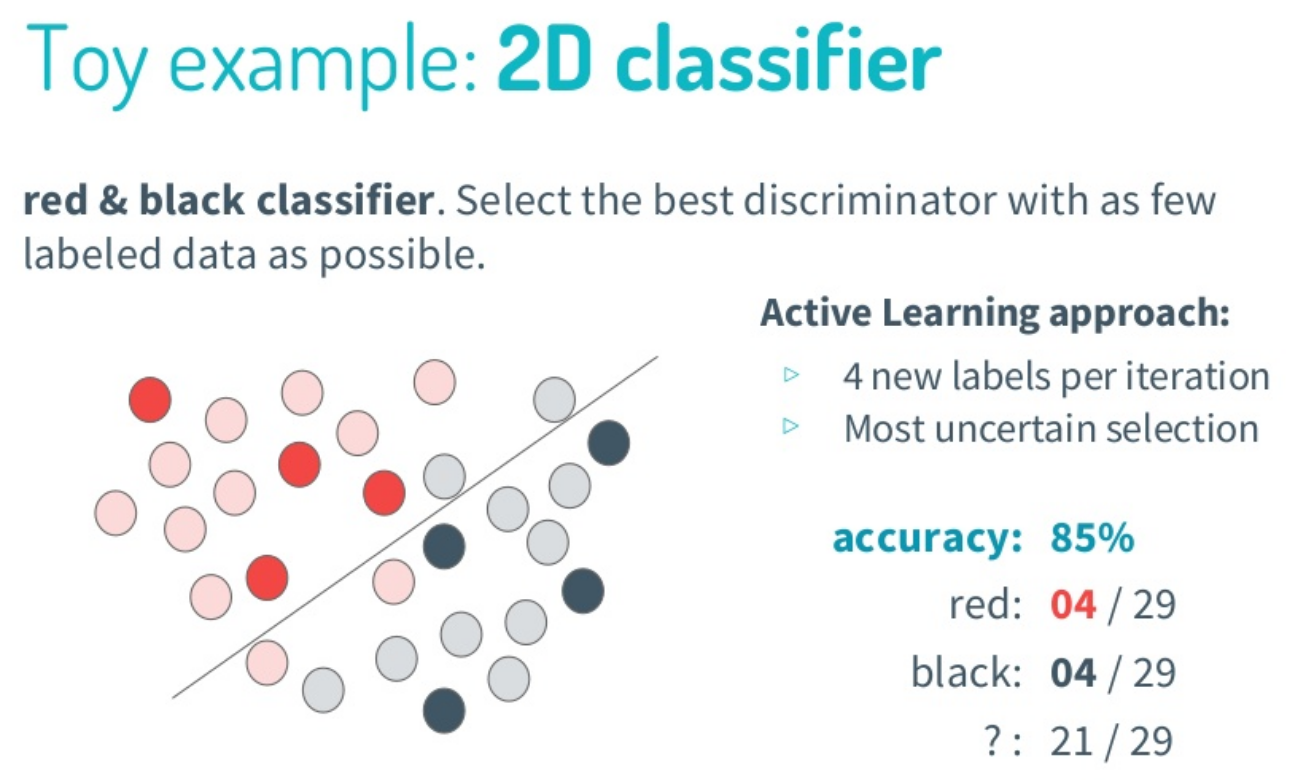

In [36]:
Image("pict/al_ex2.png", width=700)

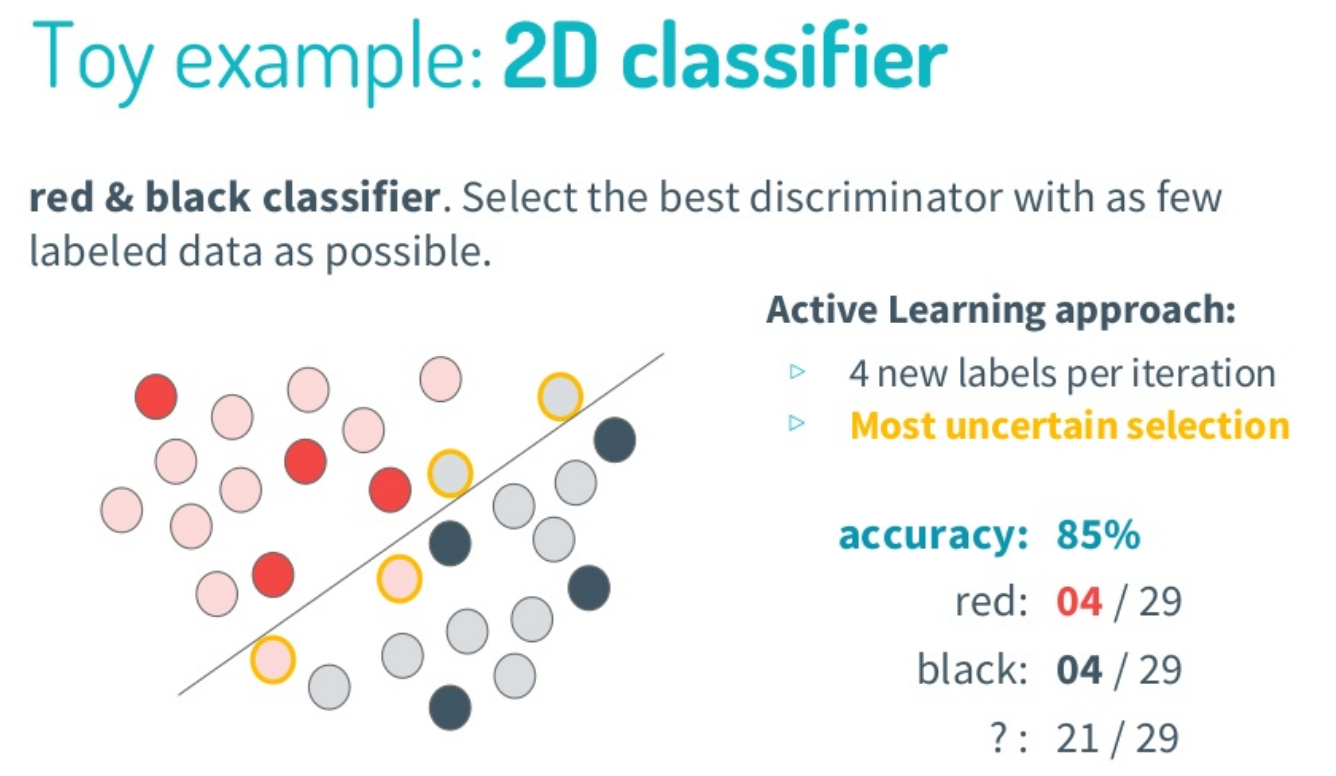

In [37]:
Image("pict/al_ex3.png", width=700)

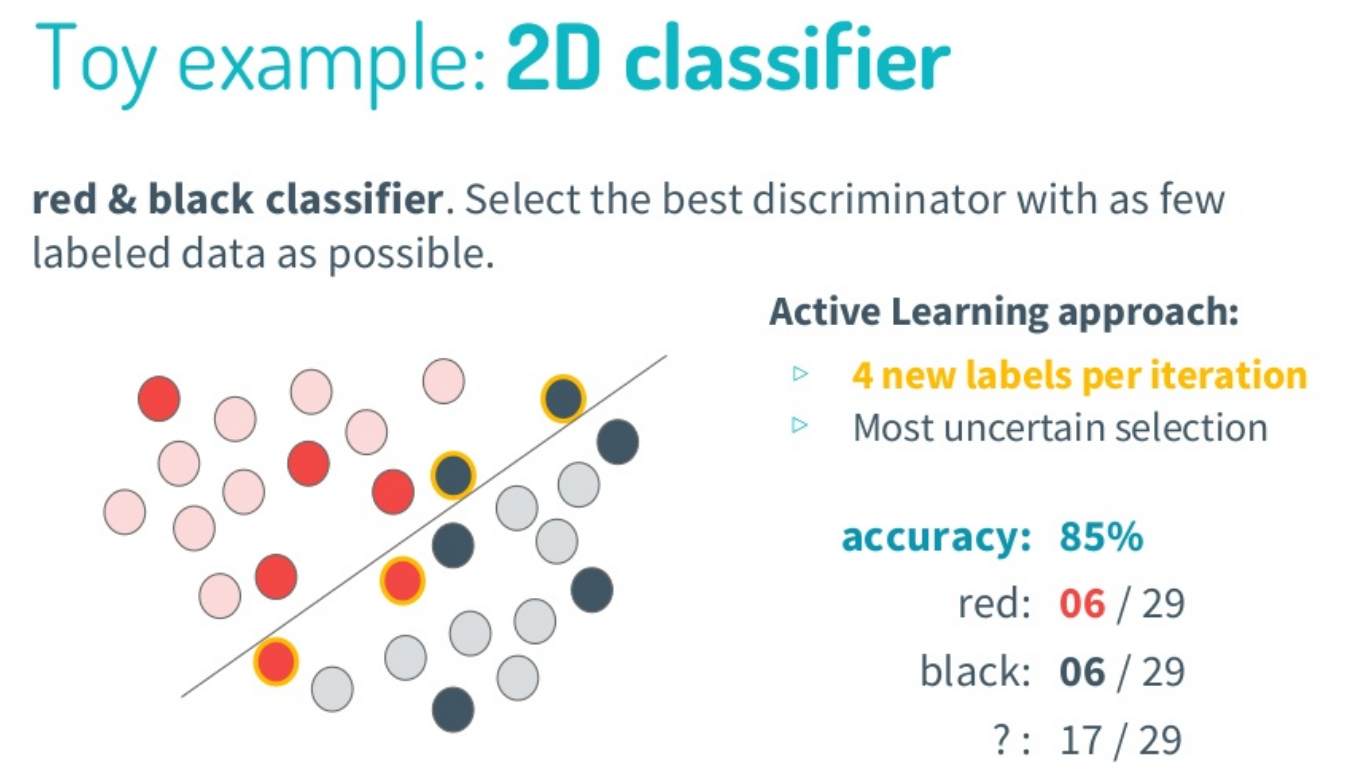

In [38]:
Image("pict/al_ex4.png", width=700)

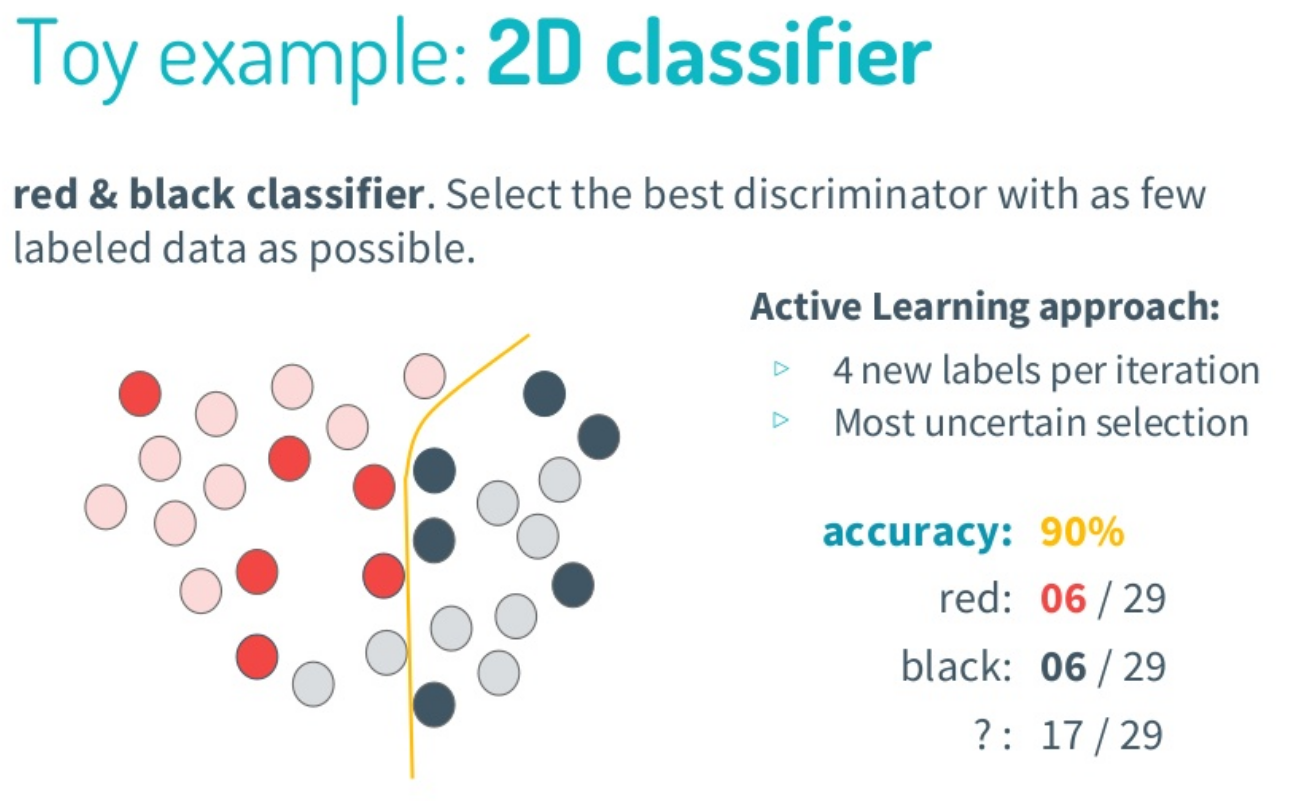

In [39]:
Image("pict/al_ex5.png", width=700)

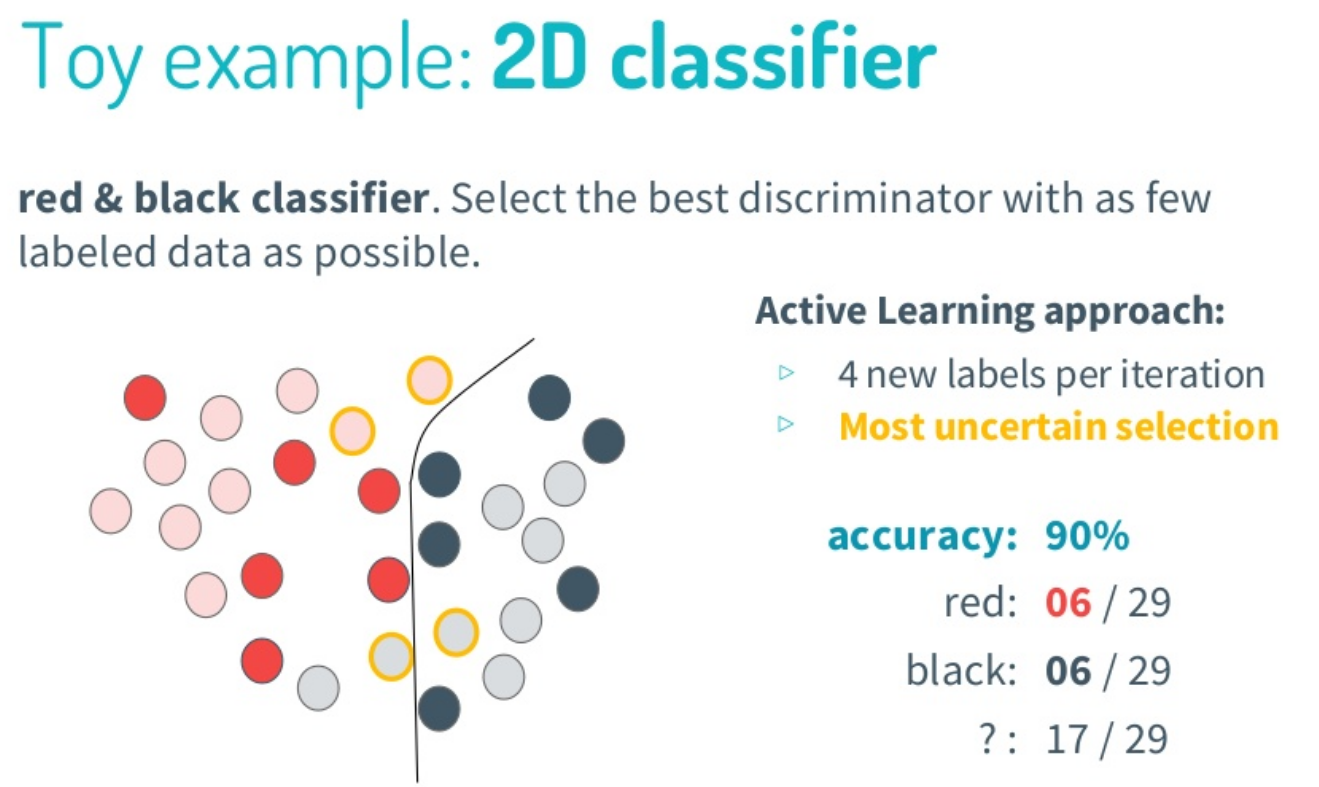

In [40]:
Image("pict/al_ex6.png", width=700)

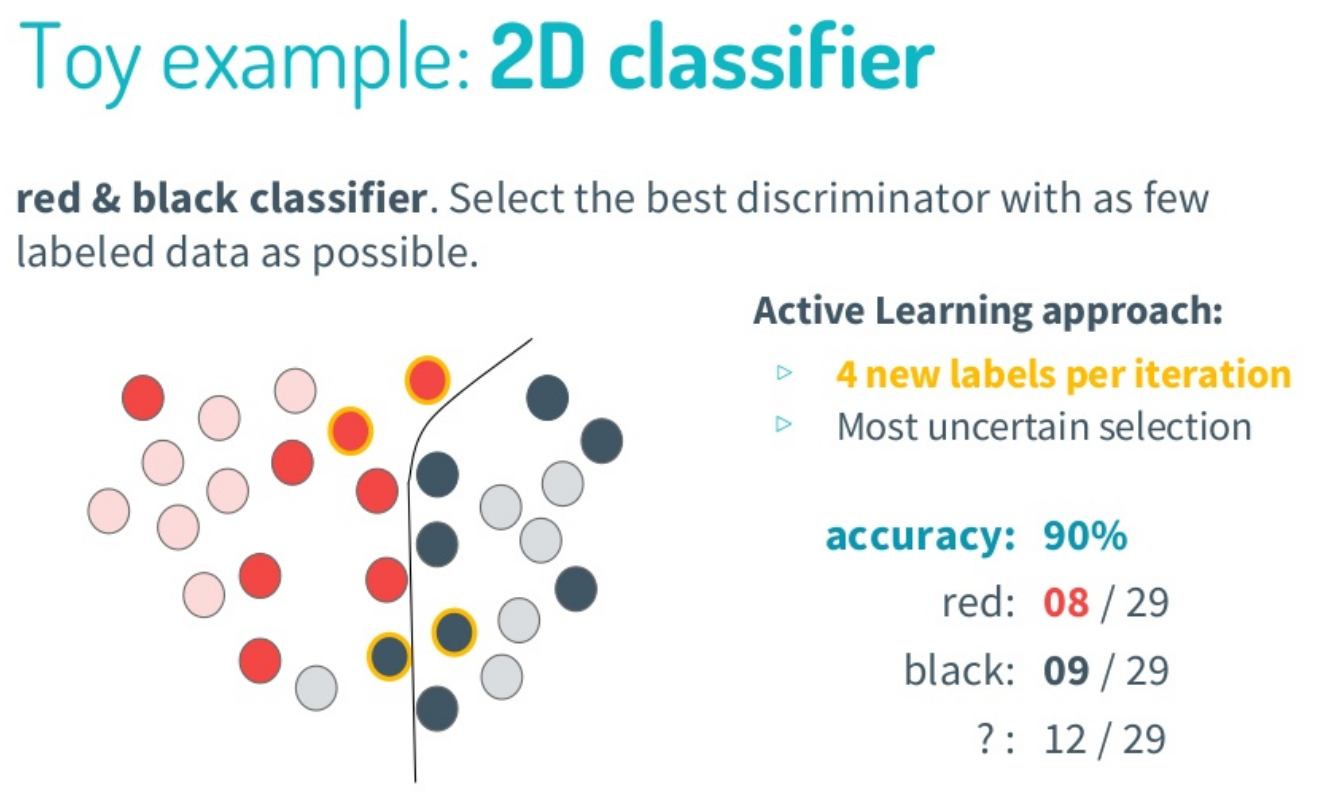

In [41]:
Image("pict/al_ex7.png", width=700)

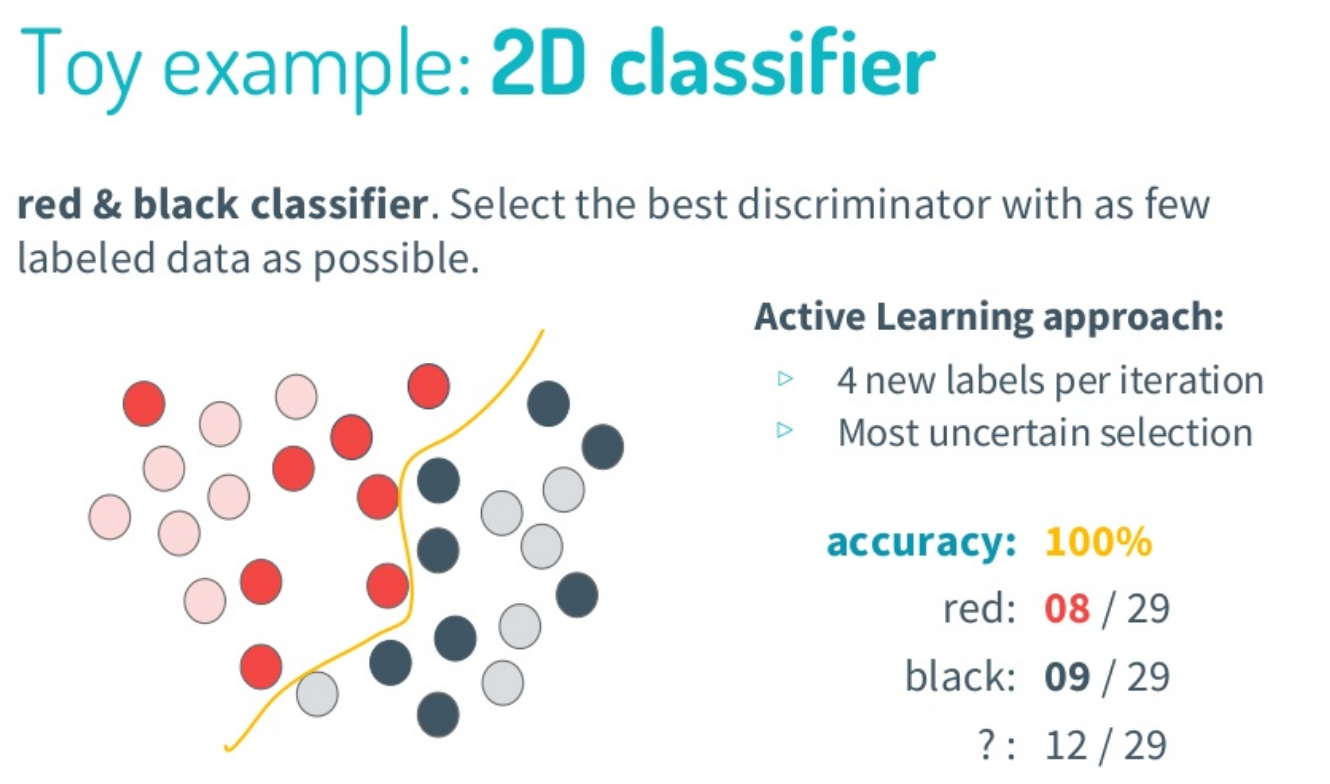

In [42]:
Image("pict/al_ex8.png", width=700)

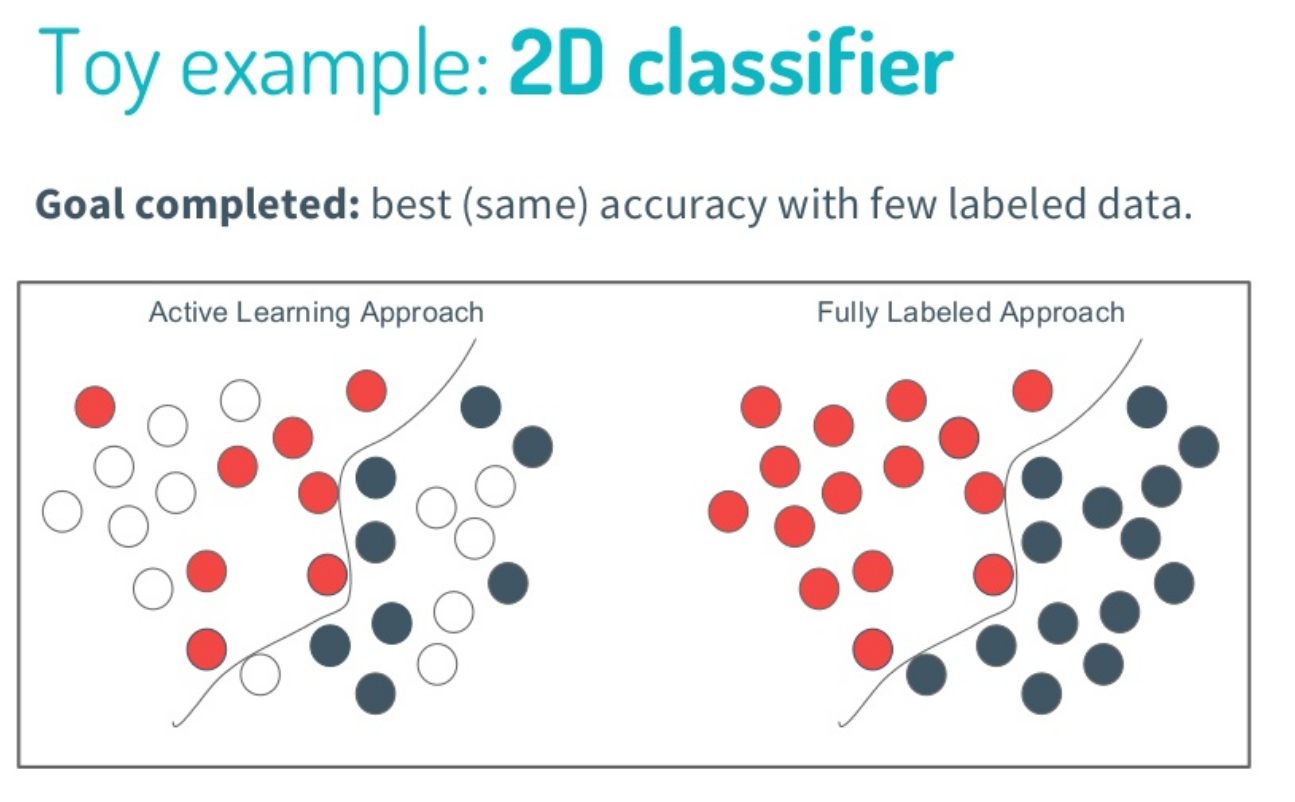

In [43]:
Image("pict/al_ex9.png", width=700)

By zaczac jednak ten cykl, musimy wpierw wybrac dane ktore damy modelowi jako pierwsze.

## Reprezentacja problemu

Wszystkie strategie wyboru są oparte na architekturze klasyfikatorów.
Każdy z klasyfikatorów jest siecią neuronową z ostatnią warstwą softmaxową. 
Znaczy to, że dla każdego przykładu generowany jest dyskretny rozkład prawdopodobieństwa o długości równej liczbie unikalnych etykiet w danym zadaniu. Każda liczba w rozkładzie odpowiada prawdopodobieństu zaklasyfikawania do odpowiadającej polu klasy.
Rozkłady te uzywane są przy heurystykach redukowania niepewności.
Funkcją straty w tych modelach jest entropia krzyżowa.

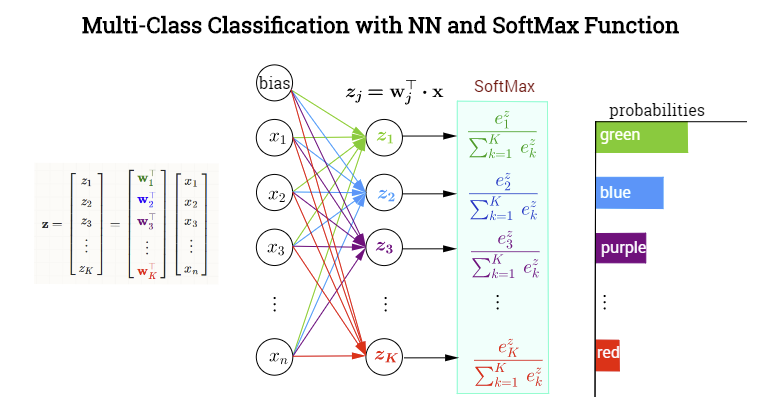

In [4]:
Image("pict/softmax.png", width=700)

## Oznakowane dane poczatkowe

### 1. Losowe

Intuicyjnie nalezy na poczatku wskazac elementy wybrane z wnetrza znalezionych klastrow, ktore leza w tym klastrze daleko od centroidow tych klastrow.

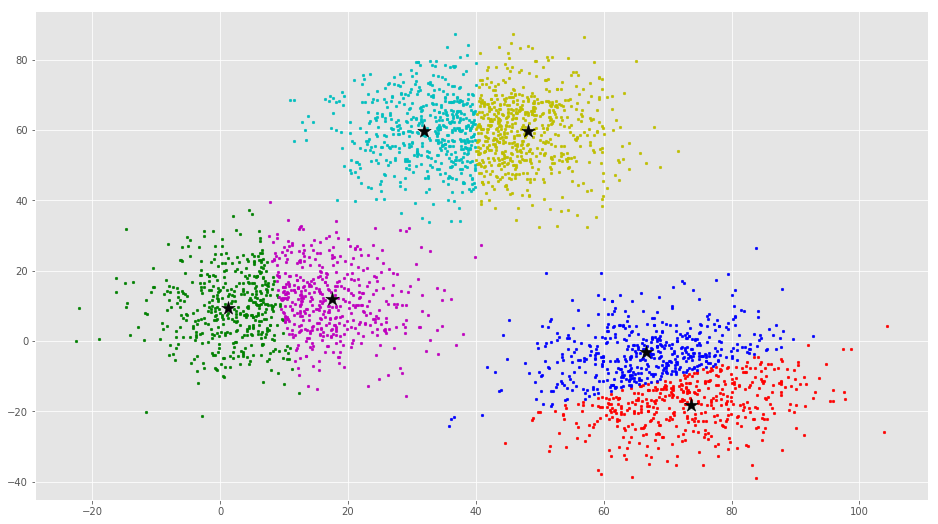

In [24]:
Image("pict/clusters.png", width=700)

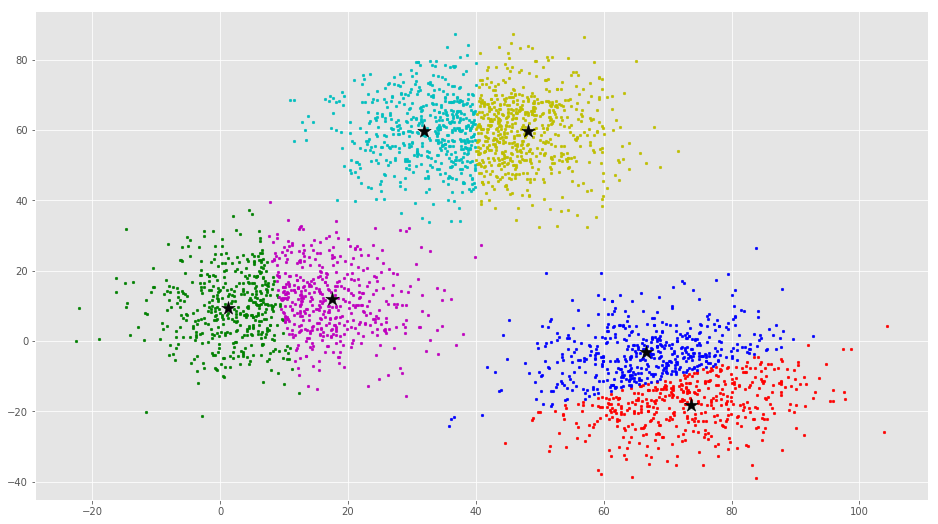

In [3]:
Image("pict/clusters.png", width=700)

Z jednej strony liczac ze beda one skupione w ta sama klase, a z drugiej ze znalezione roznice moga nam dostarczyc informatywne niepewnosci co do granic klastrow.

Zamierzam, to zbadac, a obrazy zamienię wpierw za pomoca przetrenowanych modeli takich jak na przyklad VGG19 w wektory jednowymiarowe.

### 2. Z wnetrza znalezionych klastrow

### 3. Z obrzezy znalezionych klastrow

### 4. Z miejsca posredniego wzgledem dwoch wczesniejszych  klastrow

W czasie szukania najlepszej heurystyki na tym etapie, natknąłem się na istniejące w literaturze pojęcie [core set](https://arxiv.org/abs/1703.06476), które traktuje to nad czym się zastanawiałem, czyli wybór podzbioru zestawu danych o ustalonej wielkości, który możliwie jak najlepiej odwzorowuje cały zbiór. Wygląda na to, że jest to jednak pole otwartych badań i nie ma tu metod bijących na głowe inne metody.

## Uncertainty Sampling

Najistotniejszym jednak wydaje sie byc sposob wybrania danych ktore nastepnie zostana oznaczone przez wyrocznie.

Znalazlem 5 znaczaco sie rozniacych strategi wyboru, ktore nastepnie zaimplementowalem, reszta sposobow zaliczala sie do lekkich modyfikacji heurystyk ktore za chwile przedstawie.

####  1. Random 
> Po prostu wybranie losowych punktow w danych nieoznakowanych. Heurystyka ta ma sluzyc jedynie jako baseline

####  2. The lowest from the highest
> Algorytm wybiera punkty w danych nieoznakowanych, ktore maja najmniejsze wartosci maksymale w rozkladach z nimi zwiazanych

####  3. The lowest margin
> Algorytm wybiera punkty w danych nieoznakowanych, ktore maja najmniejsza roznice miedzy wartoscia maksymalna, a minimalna w rozkladach z nimi zwiazanych

####  4. The highest entropy
> Algorytm wybiera punkty w danych nieoznakowanych, ktore maja najwieksza entropie informacyjna w rozkladach z nimi zwiazanych, to znaczy ze model jest co nich najbardziej niepewny w terminach teorii informacji

#### 5. Ensemble of classifiers
> Algorytm wykonuje m razy losowania z powtarzaniem z calego zbioru danych oznaczonych, ale kazde losowanie wykonuje sie n//2 gdzie n to aktualna licznosc zbioru danych oznaczonych.

>Nastepnie na kazdym z tych zbiorow danych uczony jest model, na ktorym przewidywana jest etykieta danych ze zbioru nieotagowanego.

>Jako najmniej pewne wybierane sa te dane co do ktorych byla najwieksza niezgodnosc podklasyfikatorow.

## Wyrocznia 

Jest to podmiot ktoremu dajemy dane wskazane przez algorytm, co do ktorych jest on najmniej pewny.

W teorii ekspert w danej dziedzinie, z ktora zwiazany jest model<br>
W rzeczywistosci ludzie rowniez sa omylni, wiec powinna to byc grupa ekspertow lub semi-ekspertow

## Eksperymenty

W nastepujacych punktach przedstawie rezultaty AL wzgledem liczby dostarczonych danych oznakowanych, przy wybranych danych i modelach ktore dawaly satysfakcjonujace wyniki na nich

### Mnist

"Najprostszy mozliwy" zbior danych, by zobaczyc czy jestem w stanie odtworzyc idee.

Zawiera czarno-biale zdjecia liczb w formacie rastrowym z dolaczona informacja jaka liczba znajduje sie na zdjeciu.

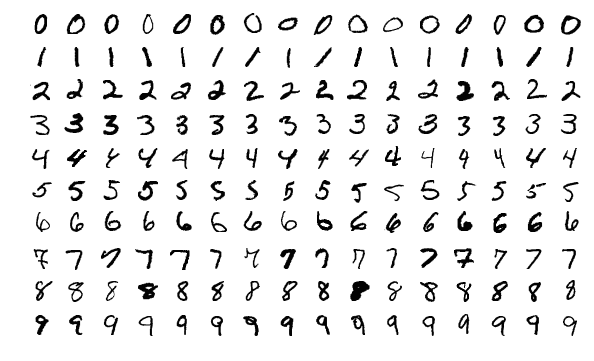

In [52]:
Image("pict/MnistExamples.png", width=700)

Zbudowany model wyglada nastepujaco

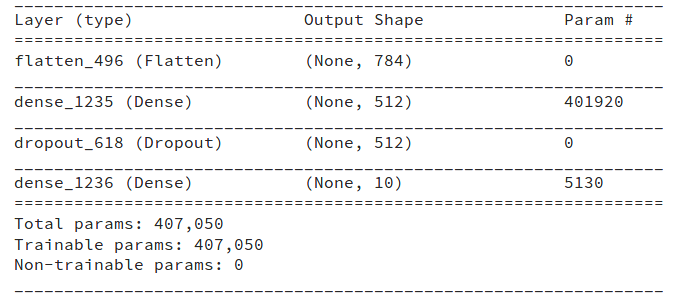

In [53]:
Image("pict/mnist_model.png", width=700)

A oto zestawione wyniki dla wszystkich algorytmow

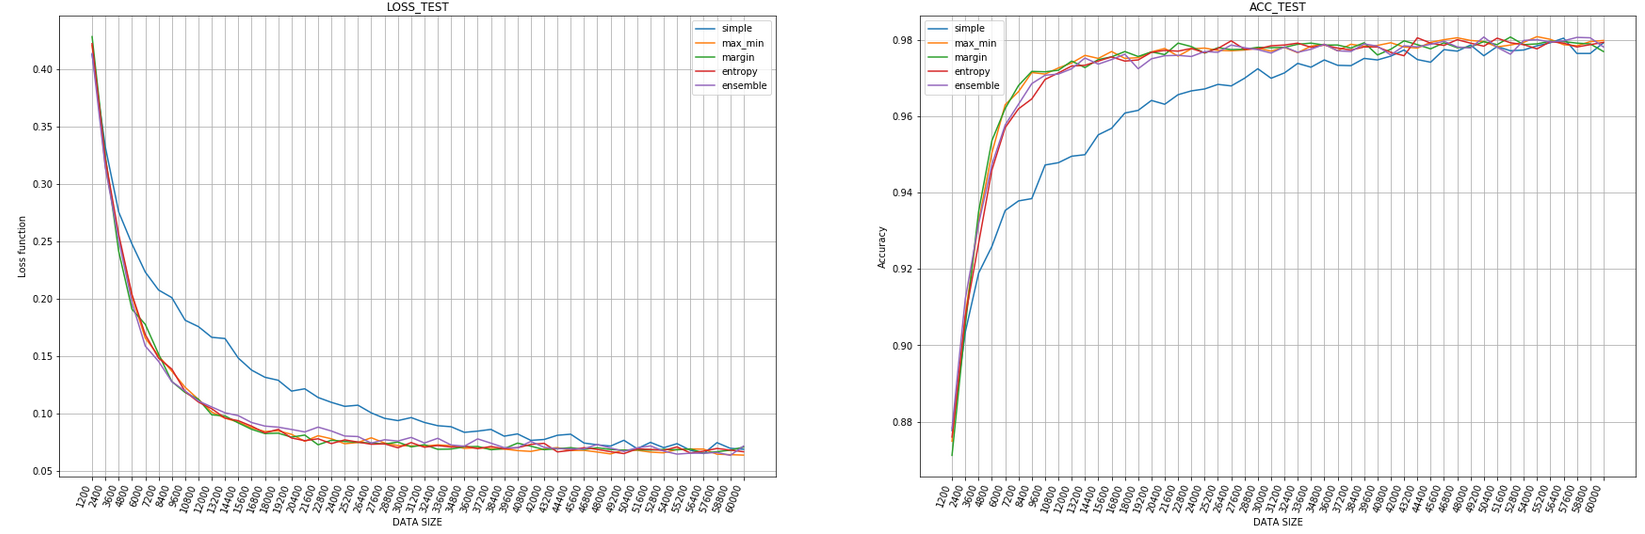

In [13]:
Image("pict/result_mnist.png", width=5000)

Na tym "prostym" zbiorze danych wszystkie strategie oprocz losowego sa porownywalne, natomiast losowa znaczaco wolniej osiaga pozadane wyniki.

### Fashion Mnist

Nieco mniej baselinowy model by zobaczyc jak radza sobie algorytmy

Zawiera czarno biale zdjecia ubran w formacie rastrowym, ktore maja sprawiac wieksza trudnosc w klasyfikacji niz dane wczesniejsze

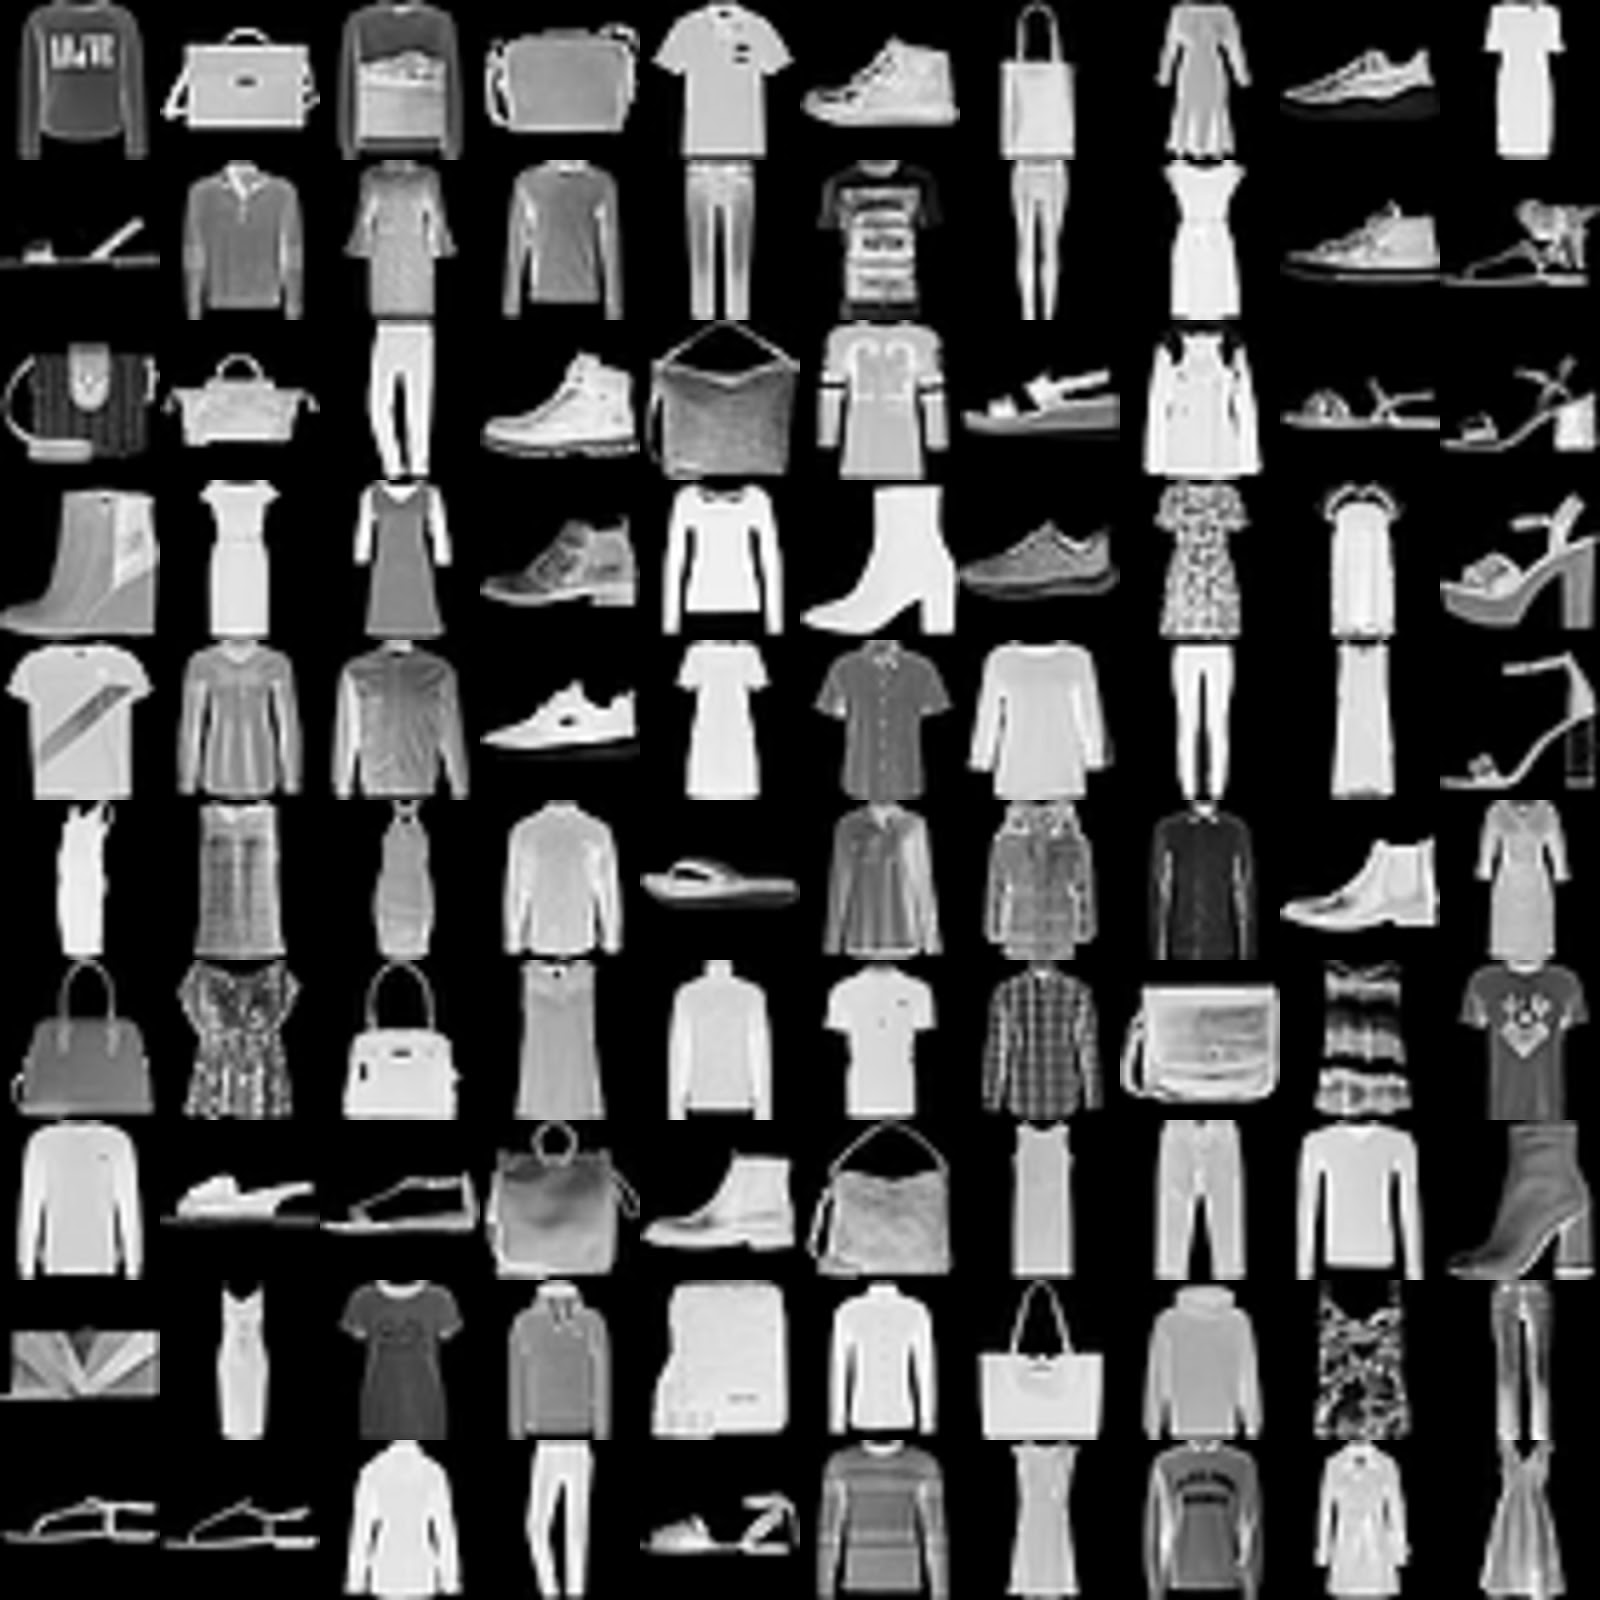

In [63]:
Image("pict/fashion_mnist_example.jpg", width=500)

Zbudowany model wyglada nastepujaco

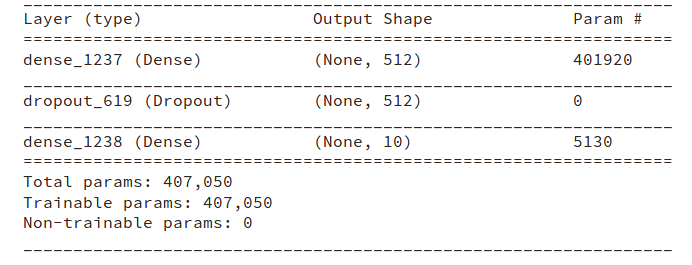

In [66]:
Image("pict/model_mnist_fashion.png", width=700)

A oto zestawione wyniki dla wszystkich algorytmow

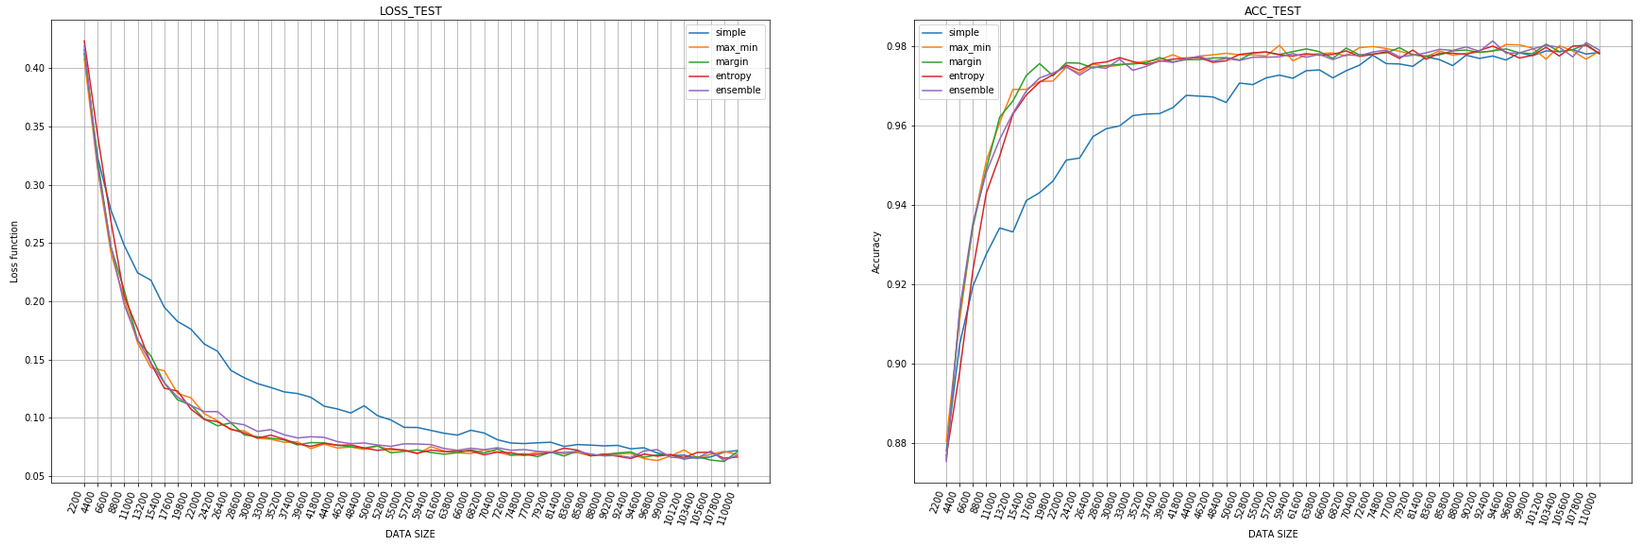

In [12]:
Image("pict/results_fashion_mnist.png", width=5000)

### Dogs vs Cats

To juz bardziej wymagajacy zbior danych, zarowno pod wzgledem czasowym, jak i obliczeniowym

W odroznieniu od wczesniejszych zdjec, te zdjecia sa kolorowe i sa faktycznymi zdjeciami, nie spreparowanymi, zrobionymi kiedys przez kogos.

Przedstawiaja zdjecia kotow albo psow.

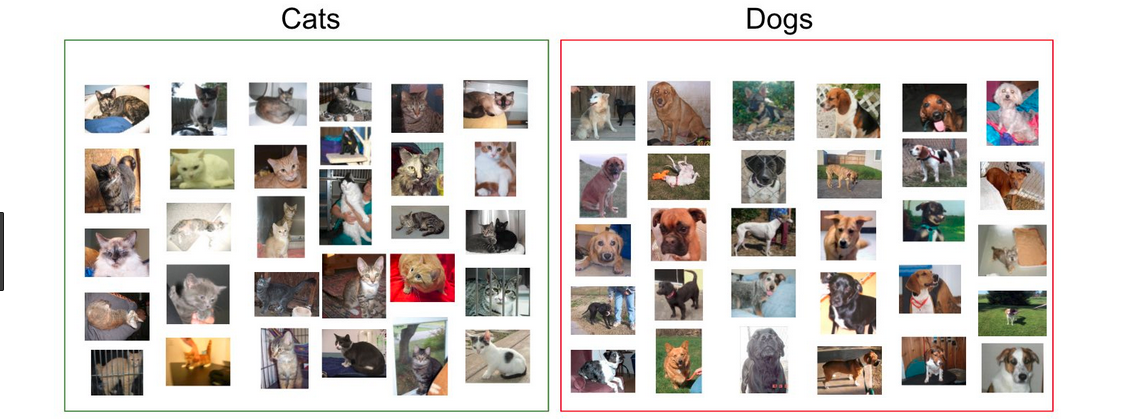

In [6]:
Image("pict/DvsC.png", width=5000)

Zbudowany model wyglada nastepujaco

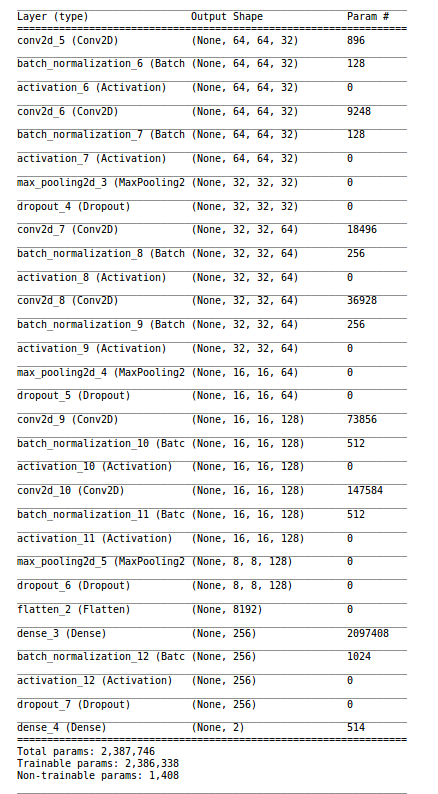

In [8]:
Image("pict/CvsD_summary.png", width=400)

A oto zestawione wyniki dla wszystkich algorytmow

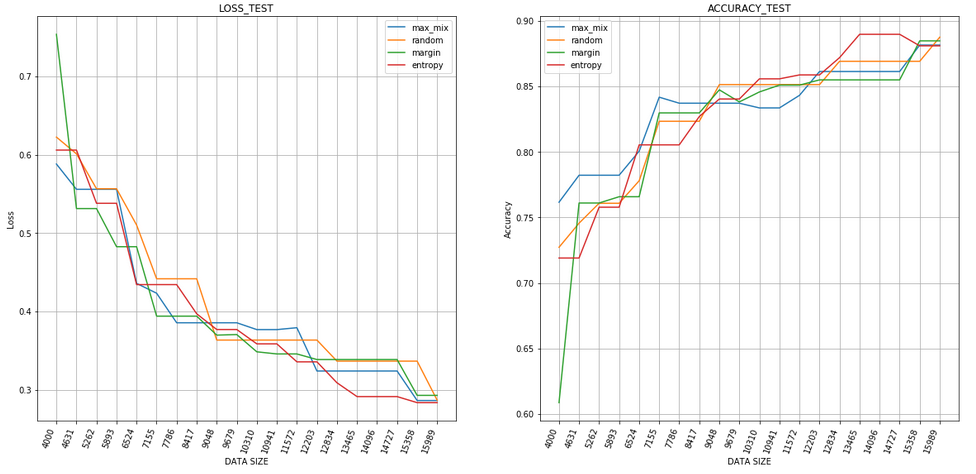

In [9]:
Image("pict/CvsD_test.png", width=5000)

### Cifar10

To juz bardziej wymagajacy zbior danych, zarowno pmod wzgledem czasowym, jak i obliczeniowym

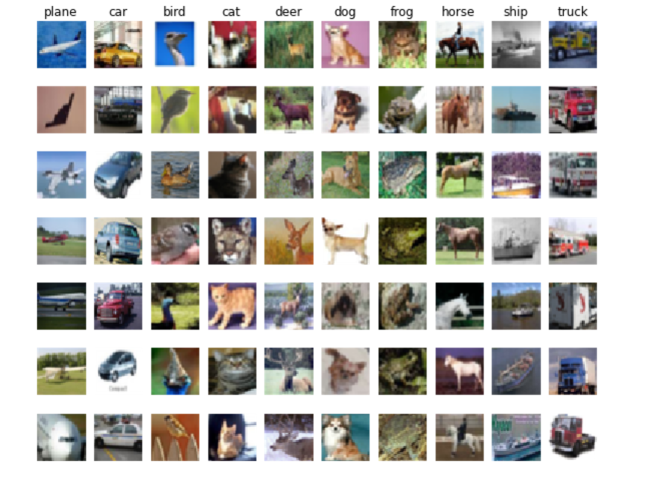

In [16]:
Image("pict/cifar10_look.png", width=500)

Zbudowany model wyglada nastepujaco

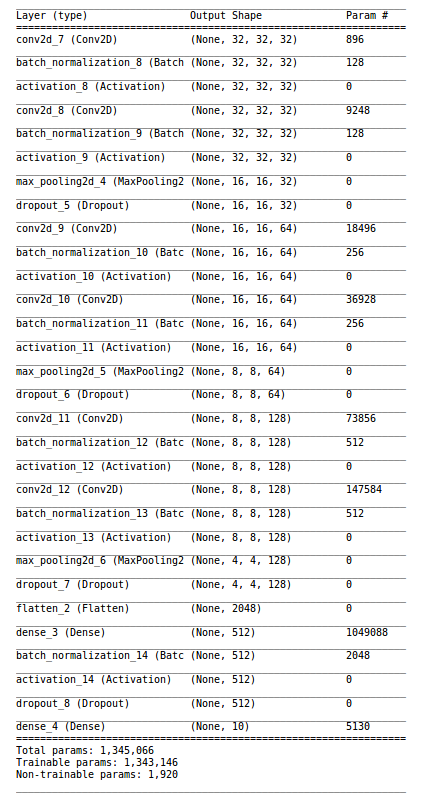

In [19]:
Image("pict/cifar10_model_summary.png", width=300)

A oto zestawione wyniki dla wszystkich algorytmow

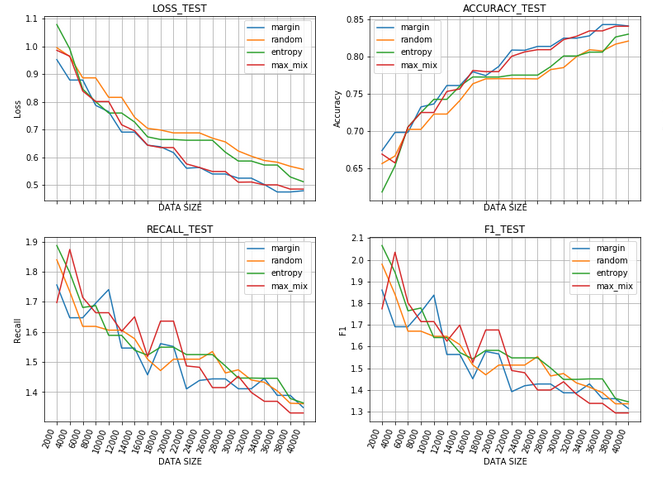

In [27]:
Image("pict/CIFAR10_test.png", width=800)

## Rozważania

W niektórych przypadkach widać spore rozbieżności na początku heurystyk, ale po dojściu do 1/4 zbioru, sytuacja wydaje się klarować
Zbadane heurystyki, zdawają się działać - nieznacznie - jednak mimo, wszystko są to heurystyki, które działają na zasadzie czarnej skrzynki.
Wskazują jedynie elementy dla których klasyfikator zwraca w odpowiednich miejscach spłaszczony rozkład, ignorując to że klasyfikator może być błędnie pewny co do niektórych przewidywań.
Klasyfikator co prawda w miare czasu reguluje swoje decyzje, ale jest to pewnie zasługa zbalansowanego zbioru danych. 
Problemem zdaje się brak możliwości mierzenia niepewności przyporządowania do poszczególnej klasy.
Ostatnia warstwa wymusza wybór którejś z klasy, poprzez konieczność powstania rozkładu. Nawet jeżeli żadna z klas nie będzie się wydawać klasyfikatorowi odpowiednia, to na przykład w problemie binarnym, mała stroniczość względem jednej z klas, stworzy przesadzone przekonanie u klasyfikatora.
Rozwiązaniem tego problemu zdaje się Bayesowskie wnioskowanie i idące z nim Bayesowskie Sieci Neuronowe. Na tą chwilę stoją przed nimi ściana obliczeniowa, ale prace na tej płaszczyźnie zdają się ruszać w dobrym [kierunku](https://arxiv.org/abs/1901.02731).
Największym problemem zdaje się więc być największe przekleństwo dzisiejszych głębokich modeli, czyli estymacja punktowa wag.

## Dalsze badania

> Zabawa z hiperparametrami AL: Wielkosc oznaczonego zbioru poczatkowego, wielkosc zbioru niepewnych danych nieoznaczonych 

> Sprawdzanie jakosc oznaczania najbardziej pewnych przykladow wyznaczonych przez algorytm w danym kroku iteracyjnym

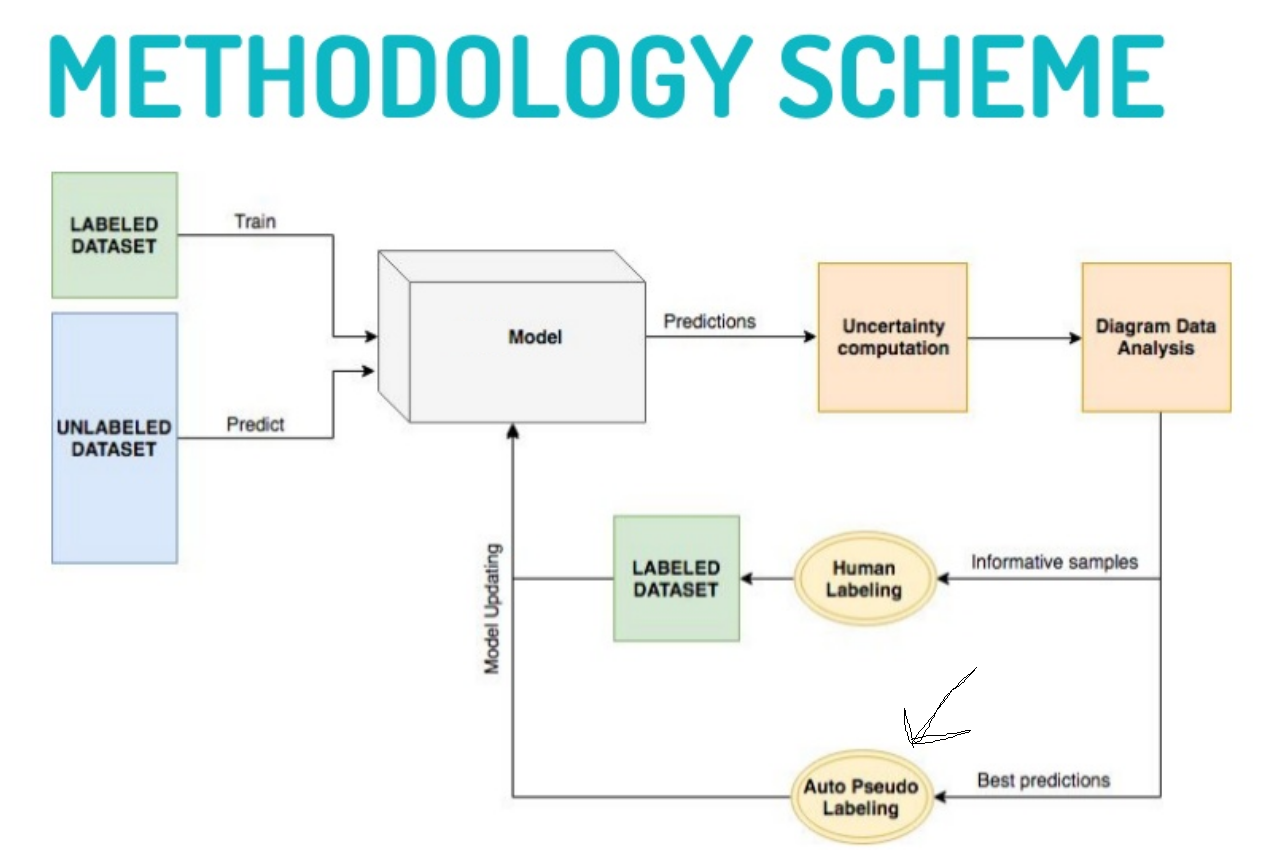

In [8]:
Image("pict/metodology_scheme.png", width=800)

> Zbadanie roznych strategii wybierania oznakowanego zbioru poczatkowego

> Wyprobowanie metody zmniejszania niepewnosci - Version Space Reduction<br>

>Wybierac przyklad ktory najbardziej redukuje wymiar version space

> Rozpatrzec inne sposoby glosowania klasyfikatorow w Ensemble of classifiers

> Ewaluacja na innych zbiorach danych

# Dziekuje :)